In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#gravity
g = 9.81

#drone parameters
m = 0.3684 #kg
l = 0.1 #m
kt = 5.734e-6   #N/(rad/s)
#moments of inertia in
Ix = .0005602 #kg*m^2
Iy = .0005602 #kg*m^2
Iz =  0.01112 #kg*m^2

#efficiency
e = 28.31577 #W/N

# part 1

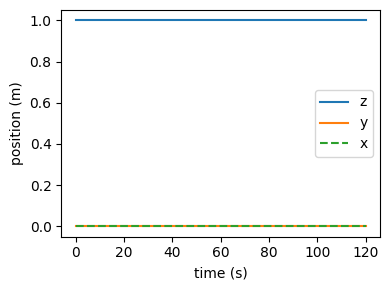

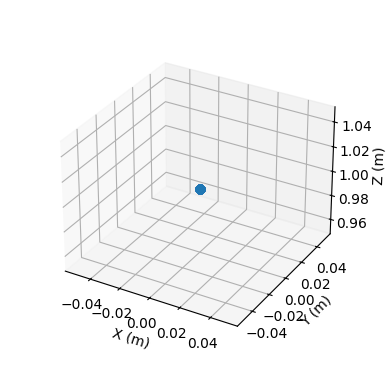

In [14]:
# Initial conditions
w0 = np.sqrt(m * g / (4 * kt))

# Simulation parameters
tf = 2 * 60  # total simulation time [s]
dt = 0.01  # time step [s]

# Initialize state variables
time = 0
w1 = w0; w2 = w0; w3 = w0; w4 = w0
x, y, z = 0, 0, 1
dx, dy, dz = 0, 0, 0
phi, theta, psi = 0, 0, 0
d_phi, d_theta, d_psi = 0, 0, 0

# Data lists for plotting
timecount = [time]
xcount = [x]
ycount = [y]
zcount = [z]
phicount = [phi]
thetacount = [theta]
psicount = [psi]

# Simulation loop
while time <= tf:
    # Translational equations of motion
    T = kt * (w1**2 + w2**2 + w3**2 + w4**2)

    ddx = -T / m * (np.cos(phi) * np.sin(theta) * np.cos(psi) + np.sin(psi) * np.sin(phi))
    ddy = -T / m * (np.cos(phi) * np.sin(theta) * np.sin(psi) - np.sin(phi) * np.cos(psi))
    ddz = -T / m * np.cos(phi) * np.cos(theta) + g

    # Rotational equations of motion
    p = d_phi - d_psi * np.sin(theta)
    q = d_theta * np.cos(phi) + d_psi * np.cos(theta) * np.sin(phi)
    r = -d_theta * np.sin(phi) + d_psi * np.cos(theta) * np.cos(phi)

    dd_phi = (Iy * q * r - Iz * q * r + kt * l * (-w2**2 + w4**2)) / Ix
    dd_theta = (-Ix * p * r + Iz * p * r + kt * l * (w1**2 - w3**2)) / Iy
    dd_psi = (Ix * p * q - Iy * p * q + kt * (w1**2 - w2**2 + w3**2 - w4**2)) / Iz

    # Update translational values
    dx += ddx * dt
    x += dx * dt + 0.5 * ddx * dt**2

    dy += ddy * dt
    y += dy * dt + 0.5 * ddy * dt**2

    dz += ddz * dt
    z += dz * dt + 0.5 * ddz * dt**2

    # Update rotational values
    d_phi += dd_phi * dt
    phi += d_phi * dt + 0.5 * dd_phi * dt**2

    d_theta += dd_theta * dt
    theta += d_theta * dt + 0.5 * dd_theta * dt**2

    d_psi += dd_psi * dt
    psi += d_psi * dt + 0.5 * dd_psi * dt**2

    # Increment time
    time += dt

    # Append data for plotting
    if round(time, 2).is_integer():
        timecount.append(round(time, 1))
        zcount.append(z)
        ycount.append(y)
        xcount.append(x)
        phicount.append(phi)
        thetacount.append(theta)
        psicount.append(psi)

# Plot results
# fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Translational positions
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.plot(timecount, zcount, label='z')
ax.plot(timecount, ycount, label='y')
ax.plot(timecount, xcount, label='x', linestyle='--')
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.legend()

plt.tight_layout()
plt.show()

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(xcount, ycount, zcount, marker='o')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_box_aspect(None, zoom=0.83)
plt.show()


# part 2

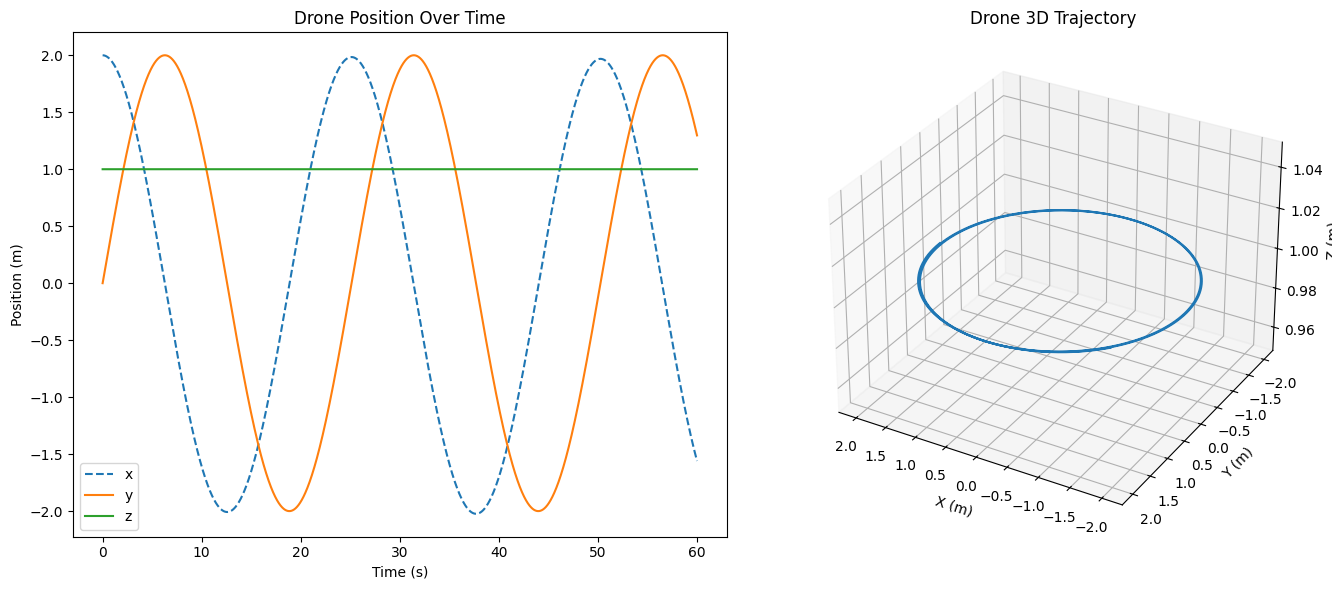

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Gravity
g = 9.81  # m/s^2

# Drone parameters
m = 0.3684  # Mass (kg)
l = 0.1     # Arm length (m)
kt = 5.734e-6  # Thrust coefficient (N/(rad/s)^2)

# Moments of inertia
Ix = 0.0005602  # kg*m^2
Iy = 0.0005602  # kg*m^2
Iz = 0.01112    # kg*m^2

# Efficiency
e = 28.31577  # W/N

# Simulation parameters
tf = 1 * 60    # Total simulation time [s] (1 minute)
dt = 0.01      # Time step [s]

# Circular motion parameters
v = 0.5         # Speed (m/s)
r = 2           # Radius (m)
omega = v / r   # Angular speed (rad/s)
a_c = v**2 / r  # Centripetal acceleration

# Initial conditions
time = 0
x = r  # Start at x = r (2 meters)
y = 0
z = 1  # Altitude is 1 meter
dx = 0
dy = v  # Initial dy to match speed v
dz = 0

# Data lists for plotting
time_list = [time]
x_list = [x]
y_list = [y]
z_list = [z]
phi_list = []
theta_list = []
psi_list = []
energy_list = [E / 3600]  # Convert back to watt-hours

# Simulation loop
while time <= tf:
    # Compute psi (yaw angle)
    psi = omega * time

    # Compute required accelerations for circular motion
    a_x = - a_c * np.cos(psi)
    a_y = - a_c * np.sin(psi)

    # Compute tilt angles to produce required accelerations
    sin_theta = a_x / g
    theta = np.arcsin(sin_theta)  # Pitch angle

    sin_phi = - a_y / g
    phi = np.arcsin(sin_phi)      # Roll angle

    # Compute accelerations based on tilt angles
    ddx = g * sin_theta
    ddy = - g * sin_phi
    ddz = 0  # No vertical acceleration; altitude remains constant

    # Update velocities using Euler integration
    dx += ddx * dt
    dy += ddy * dt

    # Update positions
    x += dx * dt
    y += dy * dt

    # z remains constant at 1 meter
    z = 1

    # Update time
    time += dt

    # Record data for plotting
    time_list.append(time)
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    phi_list.append(phi)
    theta_list.append(theta)
    psi_list.append(psi)

# Plotting results
# Plotting results

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(14, 6))

# First subplot - Position over time
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(time_list, x_list, label='x', linestyle='--')
ax1.plot(time_list, y_list, label='y')
ax1.plot(time_list, z_list, label='z')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (m)')
ax1.legend()
ax1.set_title('Drone Position Over Time')

# Second subplot - 3D Trajectory plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot3D(x_list, y_list, z_list)
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_zlabel('Z (m)')
ax2.set_title('Drone 3D Trajectory')
ax2.view_init(elev=30, azim=120)

plt.tight_layout()
plt.show()